In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!pip install lazypredict

In [4]:
!pip install xgboost

In [6]:
!pip install lightgbm

In [8]:
!pip install pytest

  Using cached pytest-5.4.3-py3-none-any.whl (248 kB)


In [9]:
from lazypredict.Supervised import LazyRegressor

In [10]:
df=pd.read_csv('AppleStore.csv')
df.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.00,4.50,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.00,3.50,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.50,4.50,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.00,4.50,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.50,5.00,7.5.1,4+,Reference,37,5,45,1


In [11]:
df.drop(columns=['Unnamed: 0','id','track_name','currency','ver','cont_rating'],inplace=True)

In [12]:
df.head()

,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,100788224,3.99,21292,26,4.00,4.50,Games,38,5,10,1
1,158578688,0.00,161065,26,4.00,3.50,Productivity,37,5,23,1
2,100524032,0.00,188583,2822,3.50,4.50,Weather,37,5,3,1
3,128512000,0.00,262241,649,4.00,4.50,Shopping,37,5,9,1
4,92774400,0.00,985920,5320,4.50,5.00,Reference,37,5,45,1


In [13]:
df.corr()

,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
size_bytes,1.00,0.18,0.00,0.01,0.07,0.09,-0.12,0.15,0.00,-0.15
price,0.18,1.00,-0.04,-0.02,0.05,0.03,-0.12,0.07,-0.01,-0.03
rating_count_tot,0.00,-0.04,1.00,0.16,0.08,0.09,0.01,0.02,0.14,-0.00
rating_count_ver,0.01,-0.02,0.16,1.00,0.07,0.08,0.04,0.02,0.01,0.01
user_rating,0.07,0.05,0.08,0.07,1.00,0.77,-0.04,0.27,0.17,0.07
user_rating_ver,0.09,0.03,0.09,0.08,0.77,1.00,-0.02,0.28,0.18,0.05
sup_devices.num,-0.12,-0.12,0.01,0.04,-0.04,-0.02,1.00,-0.04,-0.04,-0.04
ipadSc_urls.num,0.15,0.07,0.02,0.02,0.27,0.28,-0.04,1.00,0.09,0.07
lang.num,0.00,-0.01,0.14,0.01,0.17,0.18,-0.04,0.09,1.00,0.03
vpp_lic,-0.15,-0.03,-0.00,0.01,0.07,0.05,-0.04,0.07,0.03,1.00


In [191]:
x1=df.drop('user_rating',axis=1)
y1=df['user_rating']

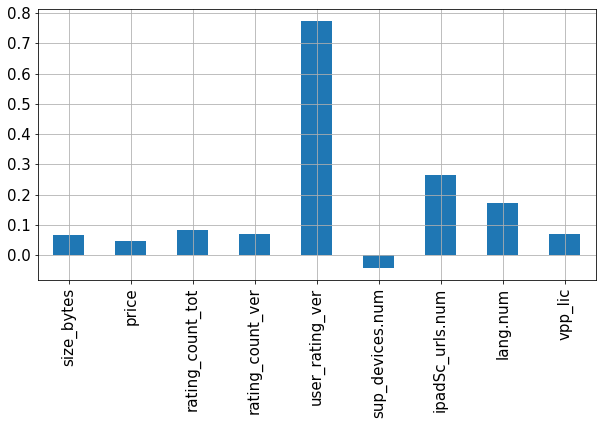

In [192]:
x1.corrwith(y1).plot(kind='bar',figsize=(10,5),fontsize=15)
plt.grid()
plt.show()

In [14]:
df.drop(columns=['sup_devices.num'],inplace=True)

In [194]:
df.head()

,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,prime_genre,ipadSc_urls.num,lang.num,vpp_lic
0,100788224,3.99,21292,26,4.0,4.5,Games,5,10,1
1,158578688,0.00,161065,26,4.0,3.5,Productivity,5,23,1
2,100524032,0.00,188583,2822,3.5,4.5,Weather,5,3,1
3,128512000,0.00,262241,649,4.0,4.5,Shopping,5,9,1
4,92774400,0.00,985920,5320,4.5,5.0,Reference,5,45,1


In [15]:
x=df.drop('user_rating',axis=1)
y=df['user_rating']

In [220]:
type(x)

pandas.core.frame.DataFrame

In [16]:
x=pd.get_dummies(data=x,columns=['prime_genre'])

In [17]:
x.drop('prime_genre_Book',axis=1,inplace=True)

In [18]:
x=x.values

In [19]:
y=y.values

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [21]:
x=scaler.fit_transform(x)

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [23]:
reg=LazyRegressor(verbose=2)

In [ ]:
models,prediction=reg.fit(x_train,x_test,y_train,y_test)

  2%|▏         | 1/43 [00:00<00:29,  1.42it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.8534632072316953, 'RMSE': 0.5737044428434785, 'Time taken': 0.7019941806793213}


  5%|▍         | 2/43 [00:01<00:26,  1.52it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 0.8999508064377608, 'RMSE': 0.4740472901866789, 'Time taken': 0.5490431785583496}


  9%|▉         | 4/43 [00:01<00:16,  2.33it/s]

{'Model': 'BayesianRidge', 'R-Squared': 0.563745737737487, 'RMSE': 0.989884932493661, 'Time taken': 0.326629638671875}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.8353939435579449, 'RMSE': 0.6080478782318233, 'Time taken': 0.12429499626159668}
{'Model': 'DummyRegressor', 'R-Squared': -0.00032518305967155214, 'RMSE': 1.4989442250584488, 'Time taken': 0.03795647621154785}


 14%|█▍        | 6/43 [00:01<00:11,  3.16it/s]

{'Model': 'ElasticNet', 'R-Squared': 0.3661109243497034, 'RMSE': 1.193222697115116, 'Time taken': 0.0720069408416748}


 19%|█▊        | 8/43 [00:02<00:08,  4.18it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.5643550352516109, 'RMSE': 0.989193426162398, 'Time taken': 0.2558438777923584}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.7619333894433089, 'RMSE': 0.7312470322826768, 'Time taken': 0.10056948661804199}


 21%|██        | 9/43 [00:05<00:39,  1.15s/it]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.872934086123087, 'RMSE': 0.5342313923344038, 'Time taken': 3.281102418899536}


 28%|██▊       | 12/43 [00:16<00:53,  1.74s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -59832.58704880656, 'RMSE': 366.5957214821879, 'Time taken': 10.71939730644226}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.4535626341434642, 'RMSE': 1.1078604707448285, 'Time taken': 0.1372241973876953}


 30%|███       | 13/43 [00:17<00:49,  1.65s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.8966437735351727, 'RMSE': 0.481818193059807, 'Time taken': 1.4450829029083252}


 35%|███▍      | 15/43 [00:20<00:41,  1.48s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9040021515009761, 'RMSE': 0.4643501840553949, 'Time taken': 2.956279993057251}
{'Model': 'HuberRegressor', 'R-Squared': 0.4012737680333992, 'RMSE': 1.1596555619375515, 'Time taken': 0.1579592227935791}


 37%|███▋      | 16/43 [00:21<00:33,  1.23s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.5285143338085505, 'RMSE': 1.0290799558613293, 'Time taken': 0.6562802791595459}


 42%|████▏     | 18/43 [00:25<00:36,  1.45s/it]

{'Model': 'KernelRidge', 'R-Squared': -5.09078170016556, 'RMSE': 3.6987194345234826, 'Time taken': 3.8467960357666016}
{'Model': 'Lars', 'R-Squared': 0.5635405452279696, 'RMSE': 0.9901177016750323, 'Time taken': 0.1377406120300293}


 44%|████▍     | 19/43 [00:25<00:25,  1.08s/it]

{'Model': 'LarsCV', 'R-Squared': 0.5638805625907382, 'RMSE': 0.9897319581671363, 'Time taken': 0.20301508903503418}
{'Model': 'Lasso', 'R-Squared': 0.17577215737634633, 'RMSE': 1.3606252076238308, 'Time taken': 0.04765748977661133}


 49%|████▉     | 21/43 [00:26<00:17,  1.23it/s]

{'Model': 'LassoCV', 'R-Squared': 0.5638636604229403, 'RMSE': 0.9897511369196949, 'Time taken': 0.3445742130279541}
{'Model': 'LassoLars', 'R-Squared': -0.00032518305967155214, 'RMSE': 1.4989442250584488, 'Time taken': 0.056415557861328125}


 58%|█████▊    | 25/43 [00:26<00:08,  2.21it/s]

{'Model': 'LassoLarsCV', 'R-Squared': 0.5638805625907382, 'RMSE': 0.9897319581671363, 'Time taken': 0.21863818168640137}
{'Model': 'LassoLarsIC', 'R-Squared': 0.5633321602523924, 'RMSE': 0.9903540363785933, 'Time taken': 0.07555341720581055}
{'Model': 'LinearRegression', 'R-Squared': 0.5635405452279696, 'RMSE': 0.9901177016750324, 'Time taken': 0.08499002456665039}


 60%|██████    | 26/43 [00:27<00:11,  1.54it/s]

{'Model': 'LinearSVR', 'R-Squared': 0.3076036218599866, 'RMSE': 1.2470741179531906, 'Time taken': 1.1050019264221191}


 63%|██████▎   | 27/43 [00:43<01:24,  5.28s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.5864790757435165, 'RMSE': 0.963748282437666, 'Time taken': 16.080329656600952}


 65%|██████▌   | 28/43 [00:47<01:11,  4.75s/it]

{'Model': 'NuSVR', 'R-Squared': 0.5316412877261842, 'RMSE': 1.0256617833111248, 'Time taken': 3.512253761291504}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.5599645250817382, 'RMSE': 0.9941655667752267, 'Time taken': 0.06680965423583984}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.5608521132559533, 'RMSE': 0.9931624033107509, 'Time taken': 0.12855887413024902}

 74%|███████▍  | 32/43 [00:47<00:26,  2.37s/it]


{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.10747179013783204, 'RMSE': 1.415878046429064, 'Time taken': 0.09469485282897949}
{'Model': 'PoissonRegressor', 'R-Squared': 0.530382764902339, 'RMSE': 1.0270388824832088, 'Time taken': 0.07375931739807129}


 77%|███████▋  | 33/43 [00:48<00:17,  1.75s/it]

{'Model': 'RANSACRegressor', 'R-Squared': 0.29232087845948873, 'RMSE': 1.2607618639165938, 'Time taken': 0.29735851287841797}


In [202]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [203]:
forest=RandomForestRegressor(n_estimators=100)
tree=DecisionTreeRegressor()

In [204]:
tree.fit(x_train,y_train)
forest.fit(x_train,y_train)

RandomForestRegressor()

In [205]:
pred_forest=forest.predict(x_test)
pred_tree=tree.predict(x_test)

In [59]:
from sklearn.metrics import mean_squared_error

In [60]:
import math

In [206]:
math.sqrt(mean_squared_error(y_test,pred_tree))

0.6325653238116115

In [207]:
math.sqrt(mean_squared_error(y_test,pred_forest))

0.4508676203844218

In [208]:
from tensorflow.keras.layers import Dense,BatchNormalization,Dropout
from tensorflow.keras.models import Sequential

In [211]:
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.024892,0.013300,0.007158,0.000147,0.9,1.0,0.133333,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.039248,0.000000,0.054145,0.000147,0.7,1.0,0.306667,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.024826,0.000000,0.063396,0.015939,0.9,1.0,0.040000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.031779,0.000000,0.088158,0.003666,0.9,1.0,0.120000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.022901,0.000000,0.331438,0.030048,1.0,1.0,0.600000,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7192,0.031315,0.000000,0.000048,0.000424,0.9,1.0,0.013333,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7193,0.029853,0.000000,0.000010,0.000169,0.9,0.0,0.013333,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7194,0.027509,0.006634,0.000005,0.000000,0.0,0.2,0.013333,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7195,0.024009,0.000000,0.000029,0.000181,0.9,0.0,0.026667,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


numpy.ndarray

In [216]:
y

0       4.0
1       4.0
2       3.5
3       4.0
4       4.5
       ... 
7192    4.5
7193    4.5
7194    4.5
7195    4.5
7196    5.0
Name: user_rating, Length: 7197, dtype: float64

In [242]:
model=Sequential()
model.add(Dense(60,activation='relu',input_dim=30))
model.add(Dense(60,activation='relu'))
model.add(Dense(1))
model.compile(loss='mse',optimizer='adam')
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 60)                1860      
_________________________________________________________________
dense_18 (Dense)             (None, 60)                3660      
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 61        
Total params: 5,581
Trainable params: 5,581
Non-trainable params: 0
_________________________________________________________________


In [243]:
model.fit(x_train,y_train,epochs=20,batch_size=16,validation_data=(x_test,y_test),verbose=2)

Train on 5397 samples, validate on 1800 samples
Epoch 1/20
5397/5397 - 2s - loss: 1.9261 - val_loss: 0.8340
Epoch 2/20
5397/5397 - 1s - loss: 0.8858 - val_loss: 0.8495
Epoch 3/20
5397/5397 - 1s - loss: 0.8729 - val_loss: 0.8140
Epoch 4/20
5397/5397 - 1s - loss: 0.8613 - val_loss: 0.7967
Epoch 5/20
5397/5397 - 1s - loss: 0.8543 - val_loss: 0.8000
Epoch 6/20
5397/5397 - 1s - loss: 0.8525 - val_loss: 0.7949
Epoch 7/20
5397/5397 - 1s - loss: 0.8447 - val_loss: 0.8076
Epoch 8/20
5397/5397 - 1s - loss: 0.8427 - val_loss: 0.7922
Epoch 9/20
5397/5397 - 1s - loss: 0.8433 - val_loss: 0.7839
Epoch 10/20
5397/5397 - 1s - loss: 0.8342 - val_loss: 0.7992
Epoch 11/20
5397/5397 - 1s - loss: 0.8308 - val_loss: 0.7946
Epoch 12/20
5397/5397 - 1s - loss: 0.8341 - val_loss: 0.7975
Epoch 13/20
5397/5397 - 1s - loss: 0.8388 - val_loss: 0.7845
Epoch 14/20
5397/5397 - 1s - loss: 0.8307 - val_loss: 0.8055
Epoch 15/20
5397/5397 - 1s - loss: 0.8320 - val_loss: 0.7957
Epoch 16/20
5397/5397 - 1s - loss: 0.8274 - va

In [244]:
pred=model.predict(x_test)

In [245]:
math.sqrt(mean_squared_error(y_test,pred))

0.8825964903145097